# ФИНАЛЬНЫЙ ПРОЕКТ ШКОЛЫ DA

**Тема проекта: Зарплаты в SF**

In [429]:
import requests
from ipywidgets import Image
Image(value=requests.get('https://i.pinimg.com/originals/8d/1f/5a/8d1f5a249678f1c01dd17c6377d19931.jpg').content)

Image(value=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x01\xc2\x01\xc2\x00\x00\xff\xdb\x00C\x00\x06\x04\x0…

**Загружаем необходимые библиотеки:**

In [602]:
import pandas as pd
import numpy as np
import sqlite3 as sql
import psycopg2
from IPython.display import HTML
import plotly.express as px
import seaborn as sns

In [603]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as g

**Выгружаем данные из database.sqlite**

In [604]:
database = 'database.sqlite'
connection = sql.connect(database)

In [605]:
query = ''' select* from Salaries'''

In [606]:
df = pd.read_sql_query(query, connection)
df

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0,400184.25,,567595.43,567595.43,2011,,San Francisco,
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,,538909.28,538909.28,2011,,San Francisco,
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,,335279.91,335279.91,2011,,San Francisco,
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916,56120.71,198306.9,,332343.61,332343.61,2011,,San Francisco,
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737,182234.59,,326373.19,326373.19,2011,,San Francisco,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148649,148650,Roy I Tillery,Custodian,0,0,0,0,0.00,0.00,2014,,San Francisco,PT
148650,148651,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,,San Francisco,
148651,148652,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,,San Francisco,
148652,148653,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,,San Francisco,


**Проводим анализ:**

In [607]:
query0=('select year, JobTitle, max(BasePay) as max, avg(BasePay) as avg from Salaries group by year,JobTitle')

In [608]:
df0 = pd.read_sql_query(query0, connection)
df0

,Year,JobTitle,max,avg
0,2011,ACCOUNT CLERK,60838.2,43300.806506
1,2011,ACCOUNTANT,65392.01,46643.172000
2,2011,ACCOUNTANT INTERN,58501.72,28732.663958
3,2011,ACUPUNCTURIST,66374.4,66374.400000
4,2011,ADMINISTRATIVE ANALYST,78587.89,63435.628602
...,...,...,...,...
4132,2014,Wire Rope Cable Maint Sprv,93904.72,93904.720000
4133,2014,Worker's Comp Supervisor 1,107520.01,54505.333333
4134,2014,Worker's Compensation Adjuster,106050.66,69915.985385
4135,2014,X-Ray Laboratory Aide,65699,45490.340286


In [609]:
query1 = ''' select sum(TotalPayBenefits) as TotalPayBenefits, Year from Salaries group by year'''

In [610]:
df1 = pd.read_sql_query(query1, connection)
df1

,TotalPayBenefits,Year
0,2.594195e+09,2011
1,3.696940e+09,2012
2,3.814772e+09,2013
3,3.821866e+09,2014


In [611]:
fig1 = px.bar(x=df1.Year.to_list(), y=df1.TotalPayBenefits, labels={'x':'Year', 'y':'TotalPayBenefits'}, 
            title =("Общая Сумма выплат по годам:")) 
fig1.show()

In [612]:
query2 = ''' select max(TotalPayBenefits) as TotalPayBenefits, JobTitle, Year 
             from Salaries 
             group by Year'''

In [613]:
df2 = pd.read_sql_query(query2, connection)
df2

,TotalPayBenefits,JobTitle,Year
0,567595.43,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,2011
1,407274.78,"Lieutenant, Fire Suppression",2012
2,425815.28,Chief of Police,2013
3,510732.68,Deputy Chief 3,2014


In [614]:
fig2 = px.bar(df2, x='Year', y='TotalPayBenefits',  
              labels={'x':'Year', 'y':'TotalPayBenefits'},
              title =(" Размер максимальной выплаты в разделе (TotalPayBenefits) по годам:"))
fig2.show()

 **1.Изменения зарплат между разными группами (Department)**

**1.1 Department - fire**

In [626]:
query3 = ''' select max(TotalPayBenefits) as max, avg(TotalPayBenefits) as avg, JobTitle, year
             From Salaries 
             where JobTitle LIKE '%fire%'  
             group by year, JobTitle
             '''

In [627]:
df3 = pd.read_sql_query(query3, connection)
df3.head()

,max,avg,JobTitle,Year
0,299494.17,203427.850000,"ASSISTANT CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)",2011
1,315981.05,216655.536889,"BATTALION CHIEF, (FIRE DEPARTMENT)",2011
2,206704.63,206704.630000,"CAPTAIN, BUREAU OF FIRE PREVENTION AND PUBLIC ...",2011
3,273702.71,179758.842394,"CAPTAIN, FIRE SUPPRESSION",2011
4,112798.37,112798.370000,CHIEF FIRE ALARM DISPATCHER,2011


In [628]:
fig3 = px.bar(df3, x= ['avg', 'max'], y='JobTitle', labels={'x':'Pay', 'y':'JobTitle'}, barmode='group',
              title = 'Максимальная и средняя выплата в Department - fire ')
fig3.show()

**1.2. Department - police**

In [550]:
query4 = ''' select max(TotalPayBenefits) as max, avg(TotalPayBenefits) as avg, JobTitle, Year
             From Salaries 
             where JobTitle LIKE '%police%'  
             group by Year, JobTitle
             limit 20
             '''

In [551]:
df4 = pd.read_sql_query(query4, connection)
df4.head()

,max,avg,JobTitle,Year
0,89305.55,60129.931283,AIRPORT POLICE SERVICES AIDE,2011
1,188999.20,188999.200000,ASSISTANT INSPECTOR (POLICE DEPARTMENT),2011
2,165094.39,150888.861000,ASSISTANT INSPECTOR II (POLICE DEPARTMENT),2011
3,186630.88,152671.215556,ASSISTANT INSPECTOR III (POLICE DEPARTMENT),2011
4,538909.28,211783.893243,CAPTAIN III (POLICE DEPARTMENT),2011


In [552]:
fig4 = px.bar(df4, x= ['avg', 'max'], y='JobTitle', barmode='group',
              title = 'Максимальная и средняя выплата в Department - Police ')
fig4.show()

**1.3. Department - medical**

In [553]:
query9 = ''' select max(TotalPayBenefits) as max, avg(TotalPayBenefits) as avg, JobTitle, Year
             From Salaries 
             where JobTitle LIKE '%medical%'  
             group by year, JobTitle
             '''

In [554]:
df9 = pd.read_sql_query(query9, connection)
df9.head()

,max,avg,JobTitle,Year
0,257124.44,257124.440000,"ADMINISTRATOR, SFGH MEDICAL CENTER",2011
1,274550.25,212793.172000,ASSISTANT MEDICAL EXAMINER,2011
2,278569.21,174010.956667,"CAPTAIN, EMERGENCYCY MEDICAL SERVICES",2011
3,123600.11,72448.176667,EMERGENCY MEDICAL SERVICES AGENCY SPECIALIST,2011
4,78304.14,44540.922182,MEDICAL EVALUATIONS ASSISTANT,2011


In [555]:
fig9 = px.bar(df9, x=['avg','max'], y='JobTitle', barmode='group',
             title = 'Максимальная и Средняя выплата в Department - medical')
fig9.show()

**2. Распределение базовой оплаты, сверхурочной работы и льгот**

In [556]:
query5 = ''' select sum(BasePay) as BasePay, sum(OtherPay) as OtherPay, sum(overtimepay) as Overtimepay, JobTitle, Year
             From Salaries  
             group by Year '''

In [557]:
df5 = pd.read_sql_query(query5, connection)
df5

,BasePay,OtherPay,Overtimepay,JobTitle,Year
0,2.299566e+09,1.307901e+08,1.638388e+08,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,2011
1,2.405835e+09,1.343223e+08,1.846910e+08,"Lieutenant, Fire Suppression",2012
2,2.576381e+09,1.436538e+08,1.986214e+08,Chief of Police,2013
3,2.537369e+09,1.336232e+08,2.059186e+08,Deputy Chief 3,2014


In [558]:
fig5 = px.bar(df5, x="Year", y=["BasePay", "OtherPay", "Overtimepay"], 
             title=" BasePay, OtherPay, Overtimepay по годам:", barmode='group')
fig5.show()

По данному графику можно сделать вывод, что наибольшая сумма приходится на BasePay, далее OvertimePay и меньше всего на OtherPay. 
И данные показатели сохраняются на протяжении всех анализируемых периодов.

**3. Распределение бюджета в (department) с течением времени.**

In [674]:
#Department - medical
query6 = ''' Select sum(TotalPayBenefits) as TotalPayBenefits, JobTitle, Year
             From Salaries   
             where JobTitle LIKE '%medical%' 
             group by year'''

In [671]:
df6 = pd.read_sql_query(query6, connection)
df6

,TotalPayBenefits,JobTitle,Year
0,26921486.59,"CAPTAIN, EMERGENCYCY MEDICAL SERVICES",2011
1,31832682.18,"Adm, SFGH Medical Center",2012
2,33782026.90,"Adm, SFGH Medical Center",2013
3,36133544.35,"Adm, SFGH Medical Center",2014


In [673]:
fig6 = px.line(x=df6.Year.to_list(), y=df6.TotalPayBenefits.to_list(), labels={'x':'Year', 'y':'TotalPayBenefits'},
              title='Распределение бюджета в (department - medical) с течением времени.')
fig6.show() 
            


In [675]:
#Department - fire
query61 = ''' Select sum(TotalPayBenefits) as TotalPayBenefits, JobTitle, Year
             From Salaries   
             where JobTitle LIKE '%fire%' 
             group by year'''

In [676]:
df61 = pd.read_sql_query(query61, connection)
df61

,TotalPayBenefits,JobTitle,Year
0,2.115633e+08,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",2011
1,2.738104e+08,"Lieutenant, Fire Suppression",2012
2,2.910384e+08,"Chief, Fire Department",2013
3,2.855368e+08,"Chief, Fire Department",2014


In [677]:
fig61 = px.line(x=df61.Year.to_list(), y=df61.TotalPayBenefits.to_list(), labels={'x':'Year', 'y':'TotalPayBenefits'},
              title='Распределение бюджета в (department - fire) с течением времени.')
fig61.show() 

In [682]:
#Department - medical
query62 = ''' Select sum(TotalPayBenefits) as TotalPayBenefits, JobTitle, Year
             From Salaries   
             where JobTitle LIKE '%medic%' 
             group by year'''

In [683]:
df62 = pd.read_sql_query(query62, connection)
df62

,TotalPayBenefits,JobTitle,Year
0,66446084.72,"CAPTAIN, EMERGENCYCY MEDICAL SERVICES",2011
1,82961477.65,EMT/Paramedic/Firefighter,2012
2,86807375.79,"Adm, SFGH Medical Center",2013
3,87881072.07,"Adm, SFGH Medical Center",2014


In [684]:
fig62 = px.line(x=df62.Year.to_list(), y=df62.TotalPayBenefits.to_list(), labels={'x':'Year', 'y':'TotalPayBenefits'},
              title='Распределение бюджета в (department - medical) с течением времени.')
fig62.show() 

**4. Количество людей в Департаменте.**

In [685]:
# Department - fire
query7 = ''' Select count(EmployeeName) as Employee,JobTitle, Year
             From Salaries
              where JobTitle LIKE '%fire%' 
             group by JobTitle
             limit 10
         '''

In [686]:
df7 = pd.read_sql_query(query7, connection)
df7

,Employee,JobTitle,Year
0,3,"ASSISTANT CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)",2011
1,18,Asst Chf of Dept (Fire Dept),2012
2,45,"BATTALION CHIEF, (FIRE DEPARTMENT)",2011
3,65,"Battalion Chief, Fire Suppress",2013
4,36,"Battlion Chief, Fire Suppressi",2012
5,1,"CAPTAIN, BUREAU OF FIRE PREVENTION AND PUBLIC ...",2011
6,71,"CAPTAIN, FIRE SUPPRESSION",2011
7,1,CHIEF FIRE ALARM DISPATCHER,2011
8,1,"CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)",2011
9,14,"Capt,Fire Prev or Fire Invsgtn",2013


In [687]:
fig7 = px.bar(x=df7.JobTitle.to_list(), y=df7.Employee.to_list(), labels={'x':'JobTitle', 'y':'Employee'}, 
            title =("Количество сотрудников в Department - fire")) 
fig7.show()

In [697]:
# Department - medical
query72 = ''' Select count(EmployeeName) as Employee,JobTitle, Year
             From Salaries
              where JobTitle LIKE '%medical%' 
             group by JobTitle
         '''

In [701]:
df72 = pd.read_sql_query(query72, connection)
df72.head()

,Employee,JobTitle,Year
0,1,"ADMINISTRATOR, SFGH MEDICAL CENTER",2011
1,5,ASSISTANT MEDICAL EXAMINER,2011
2,3,"Adm, SFGH Medical Center",2012
3,24,"CAPTAIN, EMERGENCYCY MEDICAL SERVICES",2011
4,6,EMERGENCY MEDICAL SERVICES AGENCY SPECIALIST,2011


In [702]:
fig72 = px.scatter(x=df72.JobTitle.to_list(), y=df72.Employee.to_list(), labels={'x':'JobTitle', 'y':'Employee'}, 
            title =("Количество сотрудников в Department - medical")) 
fig72.show()

**5. Количество сотрудников с разным уровнем дохода. (гистограмма с шагом 5к)**

In [703]:
df_1=pd.read_csv('Salaries.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning:

Columns (3,4,5,6,12) have mixed types.Specify dtype option on import or set low_memory=False.



In [704]:
df_1['TotalPay_for_hist' ] = (df_1['TotalPay'] // 5000) * 5000

In [705]:
df_1['TotalPay_for_hist'] = df_1['TotalPay_for_hist'].map(lambda x: str(x) +'-'+str((x+5000)))

In [706]:
df_1= df_1[df_1.EmployeeName != 'Not provided']

In [707]:
df_1_hist = df_1.groupby('TotalPay_for_hist').count()

In [708]:
df_1_hist = df_1_hist.reset_index()

In [709]:
import plotly.graph_objects as go

In [710]:
fig = go.Figure(
data = [ go.Bar(name= 'Group A',
               x= df_1_hist['TotalPay_for_hist'].tolist(),
               y = df_1_hist['TotalPay'].tolist())])
fig.show()

**6. На базе линейной регрессии построим прогноз по тому, какие будут закупки на следующий год.**

6.1 Определим какие будут закупки для департамента Fire

In [711]:
query9 = ''' Select  TotalPayBenefits, Year
             From Salaries
             where JobTitle LIKE '%fire%'
             group by Year
         '''

In [712]:
df9 = pd.read_sql_query(query9, connection)
df9

,TotalPayBenefits,Year
0,326373.19,2011
1,407274.78,2012
2,422353.40,2013
3,417435.10,2014


In [713]:
fig9 = px.bar(x=df9.Year.to_list(), y=df9.TotalPayBenefits.to_list(), labels={'x':'Year', 'y':'TotalPayBenefits'})
fig9.show() 
            

In [714]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [715]:
from sklearn.model_selection import train_test_split

In [716]:
x = df9.drop('TotalPayBenefits',axis=1)
y = df9['TotalPayBenefits']

In [717]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=777)

In [718]:
print('X_train', X_train.shape)

X_train (2, 1)


In [719]:
print('X_test', X_test.shape)

X_test (2, 1)


In [720]:
model_df_department = LinearRegression()

In [721]:
model_df_department.fit(x,y)

LinearRegression()

In [722]:
pred = model_df_department.predict(X_test)

In [723]:
pred

array([350119.465     , 378945.90000001])

In [724]:
y_test

0    326373.19
1    407274.78
Name: TotalPayBenefits, dtype: float64

**Предсказание на 2015 год:**

In [725]:
model_df_department.predict([[2015]])

array([465425.20500001])

In [726]:
from sklearn.metrics import mean_squared_error

In [727]:
print('Ошибка MSE (fire)=',mean_squared_error(y_test,pred,squared=True))

Ошибка MSE (fire)= 683205509.2149293


In [728]:
import matplotlib.pyplot as plt

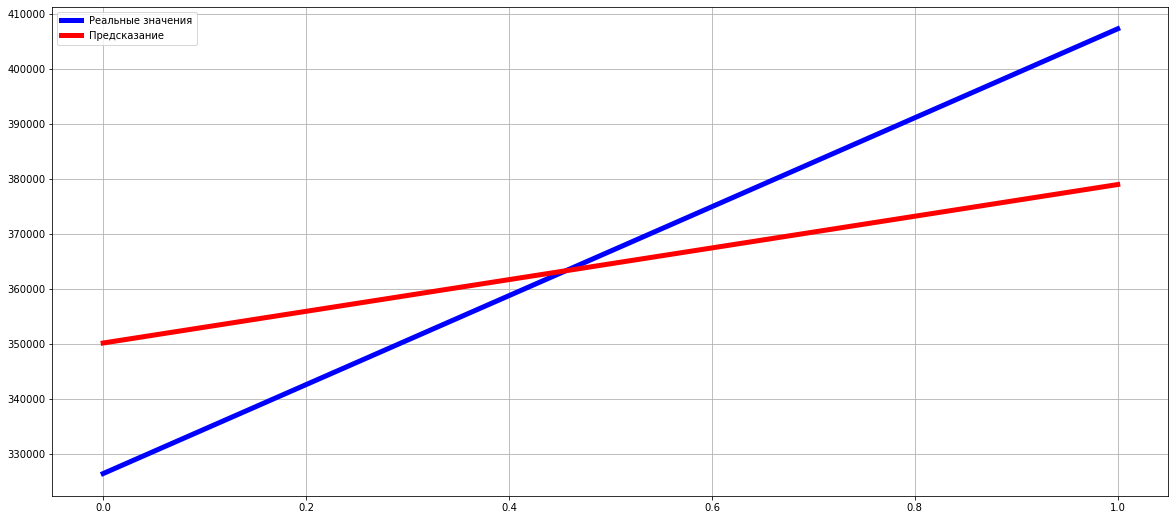

In [729]:
plt.figure(figsize=(20,9))
plt.plot(y_test.values, "blue", linewidth=5, label = 'Реальные значения')
plt.plot(pred, "red", linewidth=5, label = 'Предсказание')
plt.legend(loc='best')
plt.grid(True)
plt.show()

Таким образом, по полученным данным, можно сделать вывод, что будет снижение общей суммы выплат.